## 23 October: an update
- [x] Implemented class to load and convert the MPS tensors into wavefunctions for the QCNN circuit
- [x] Included the floating phase in the QCNN 
- [x] Fixed some errors in the QCNN
- [ ] Tested higher number of qubits $(>12)$
- [ ] Batching

In [64]:
# Load the class
import sys, numpy as np, matplotlib.pyplot as plt, time
sys.path.append('../src/')
import ANNNIstates as ANNNI

In [94]:
TT = ANNNI.mps(gpu=True)

Labels: [0 1 2]
Number of training points: 41


  0%|          | 0/2000 [00:00<?, ?it/s]/home/saverio/.local/lib/python3.10/site-packages/autoray/autoray.py:981: UserWarning: Explicitly requested dtype <class 'jax.numpy.complex128'> requested in astype is not available, and will be truncated to dtype complex64. To enable more dtypes, set the jax_enable_x64 configuration option or the JAX_ENABLE_X64 shell environment variable. See https://github.com/google/jax#current-gotchas for more.
  return x.astype(dtype, **kwargs)
Loss: 0.05064: 100%|██████████| 2000/2000 [01:17<00:00, 25.78it/s]


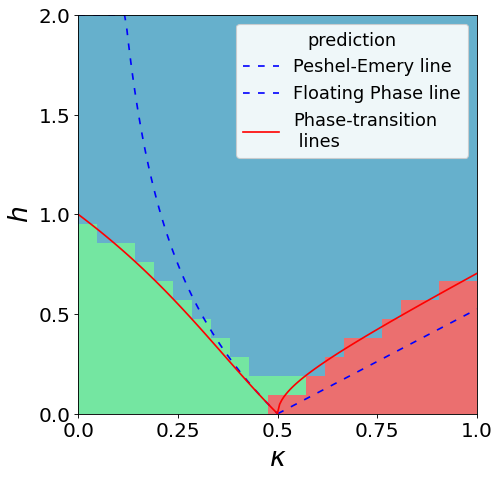

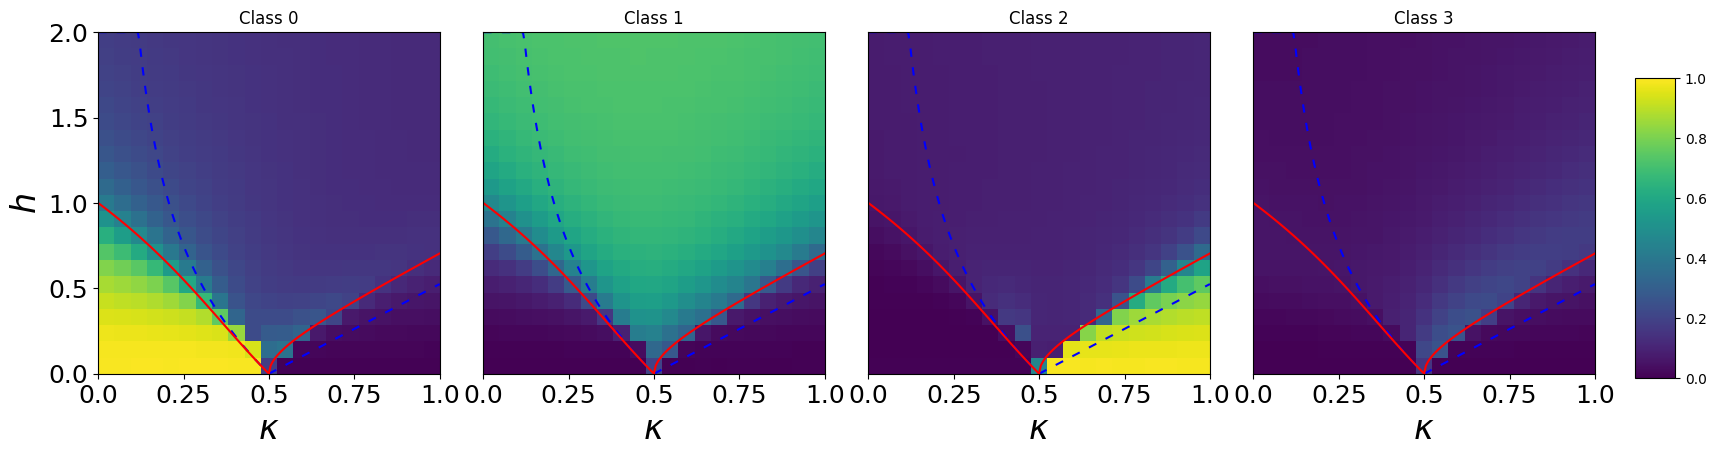

In [9]:
TT.train(epochs=2000)
TT.predict(plot=True, eachclass=True)

### Search for the Floating Phase:

In [26]:
samples_per_class = 10
X = np.array([])
for phase in [0,1,2,3]:
    X = np.append(X, np.random.choice(np.where(TT.labels4 == phase)[0],samples_per_class))

X = X.astype(int)

Labels: [0 1 2 3]
Number of training points: 40


Loss: 0.11840: 100%|██████████| 500/500 [00:14<00:00, 34.09it/s]


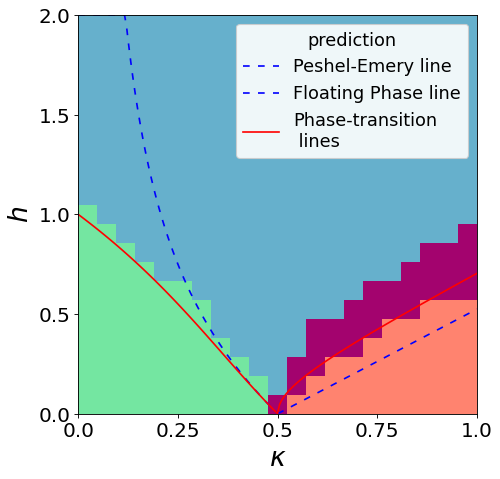

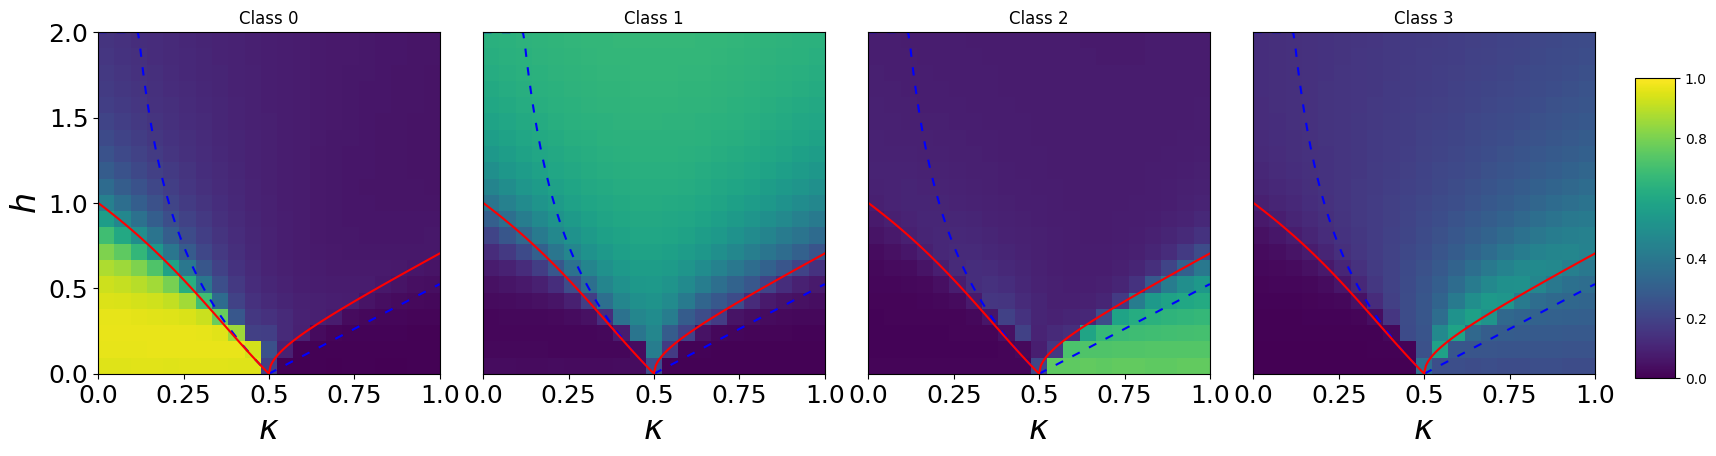

In [27]:
TT.qcnn.reset_params()
TT.train(epochs=500, train_indices=X, labels4=True)
TT.predict(plot=True, eachclass = True)

---
### TODO:

####  1. Use a higher number of sites $(>12)$

For a QCNN, 15 states (5 for each class) have been proven to be enough for the training process. 
Adding more state is redundant since they are somewhat similar to each other.

<img src="../imgs/presentations/23oct/accuracies12.svg.png" alt="drawing" width="500" style="background-color:white;"/>.

##### L = 14, Nstates = 25

In [62]:
TT = ANNNI.mps(folder='../fakedata/14/', gpu=True)

In [65]:
start = time.time()
TT.train(epochs = 100, train_indices=np.arange(25))
stop = time.time() 

time14 = stop - start

Labels: [0 1 2]
Number of training points: 25


  0%|          | 0/100 [00:00<?, ?it/s]/home/saverio/.local/lib/python3.10/site-packages/autoray/autoray.py:981: UserWarning: Explicitly requested dtype <class 'jax.numpy.complex128'> requested in astype is not available, and will be truncated to dtype complex64. To enable more dtypes, set the jax_enable_x64 configuration option or the JAX_ENABLE_X64 shell environment variable. See https://github.com/google/jax#current-gotchas for more.
  return x.astype(dtype, **kwargs)
Loss: 0.22623: 100%|██████████| 100/100 [00:26<00:00,  3.78it/s]


##### L = 16, Nstates = 25

In [87]:
TT = ANNNI.mps(folder='../fakedata/16/', gpu=True)

In [88]:
start = time.time()
TT.train(epochs = 100, train_indices=np.arange(25))
stop = time.time() 

time16 = stop - start

Labels: [0 1 2]
Number of training points: 25


  0%|          | 0/100 [00:00<?, ?it/s]/home/saverio/.local/lib/python3.10/site-packages/autoray/autoray.py:981: UserWarning: Explicitly requested dtype <class 'jax.numpy.complex128'> requested in astype is not available, and will be truncated to dtype complex64. To enable more dtypes, set the jax_enable_x64 configuration option or the JAX_ENABLE_X64 shell environment variable. See https://github.com/google/jax#current-gotchas for more.
  return x.astype(dtype, **kwargs)
Loss: -5.06269: 100%|██████████| 100/100 [01:12<00:00,  1.38it/s]


##### L = 18, Nstates = 25

In [98]:
TT = ANNNI.mps(folder='../fakedata/18/', gpu=True)

In [100]:
start = time.time()
TT.train(epochs = 100, train_indices=np.arange(16))
stop = time.time() 

time18 = stop - start

Labels: [0 1 2]
Number of training points: 16


  0%|          | 0/100 [00:00<?, ?it/s]/home/saverio/.local/lib/python3.10/site-packages/autoray/autoray.py:981: UserWarning: Explicitly requested dtype <class 'jax.numpy.complex128'> requested in astype is not available, and will be truncated to dtype complex64. To enable more dtypes, set the jax_enable_x64 configuration option or the JAX_ENABLE_X64 shell environment variable. See https://github.com/google/jax#current-gotchas for more.
  return x.astype(dtype, **kwargs)
Loss: 0.22923: 100%|██████████| 100/100 [03:05<00:00,  1.85s/it]


##### L = 20, Nstates = 25

In [ ]:
# TT = ANNNI.mps(folder='../fakedata/20/', gpu=True)

In [ ]:
# start = time.time()
# TT.train(epochs = 100, train_indices=np.arange(25))
# stop = time.time() 
# 
# time20 = stop - start

Text(0.5, 1.0, 'Time for training (100 Epochs)')

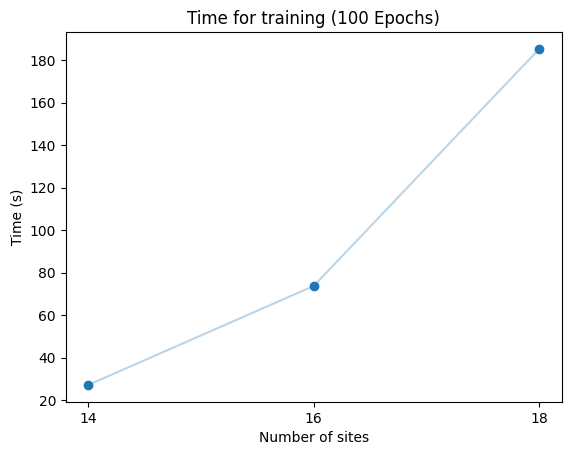

In [109]:
xs = [14,16,18]
ys = [time14,time16,time18]

plt.plot(xs,ys,alpha=0.3); plt.xlabel('Number of sites'); plt.ylabel('Time (s)')
plt.xticks(xs); plt.scatter(xs,ys); plt.title('Time for training (100 Epochs)')

####  2. Inspect whether there exist a way to embed an MPS directly 

<img src="../imgs/presentations/23oct/todo2.png" alt="drawing" width="800" style="background-color:white;"/>.

## Additional stuff:

### A1: Training using only ONE of the three phases:

Training using phase FERROMAGNETIC
Labels: [0]
Number of training points: 20


  0%|          | 0/250 [00:00<?, ?it/s]/home/saverio/.local/lib/python3.10/site-packages/autoray/autoray.py:981: UserWarning: Explicitly requested dtype <class 'jax.numpy.complex128'> requested in astype is not available, and will be truncated to dtype complex64. To enable more dtypes, set the jax_enable_x64 configuration option or the JAX_ENABLE_X64 shell environment variable. See https://github.com/google/jax#current-gotchas for more.
  return x.astype(dtype, **kwargs)
Loss: 0.02388: 100%|██████████| 250/250 [00:17<00:00, 14.39it/s]


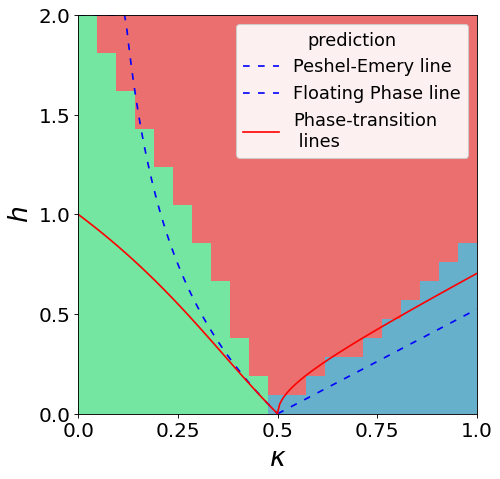

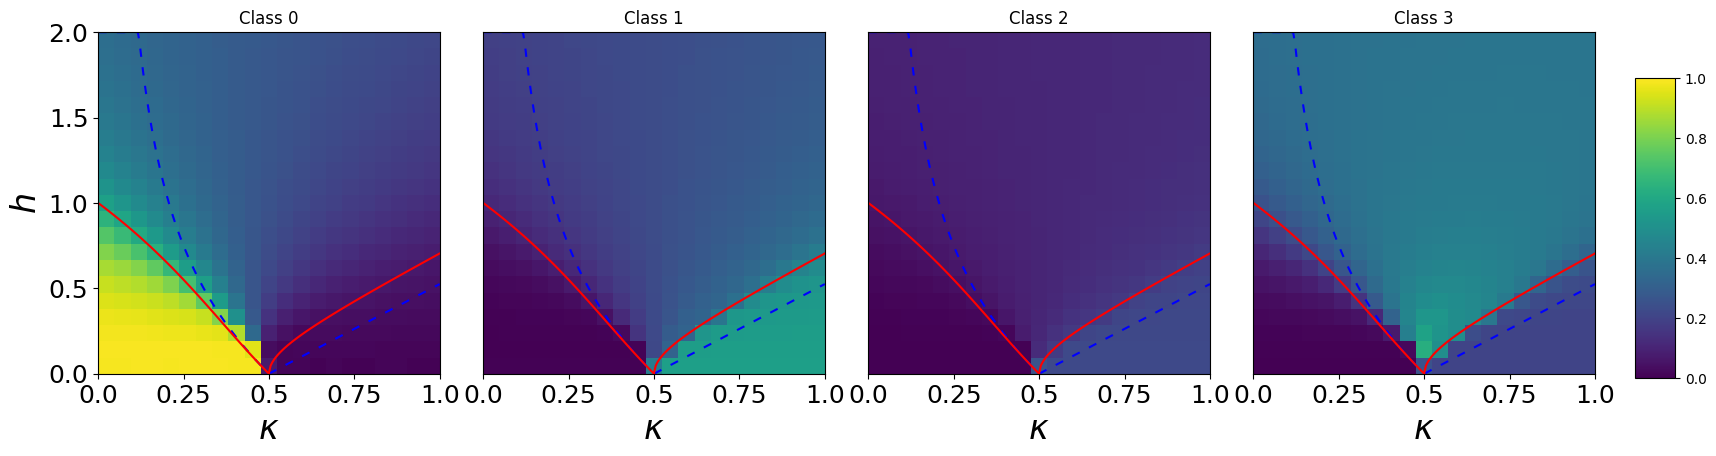

Training using phase PARAMAGNETIC
Labels: [1]
Number of training points: 10


Loss: 0.01434: 100%|██████████| 250/250 [00:18<00:00, 13.59it/s] 


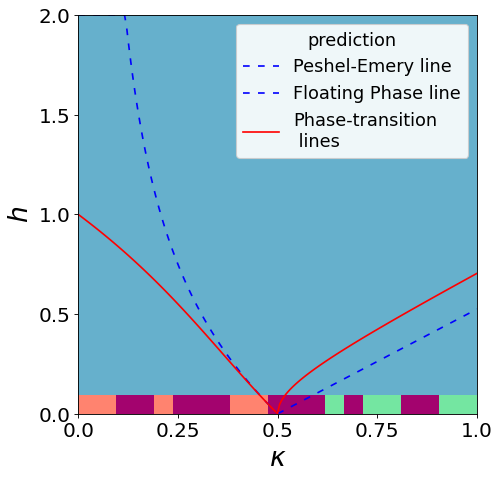

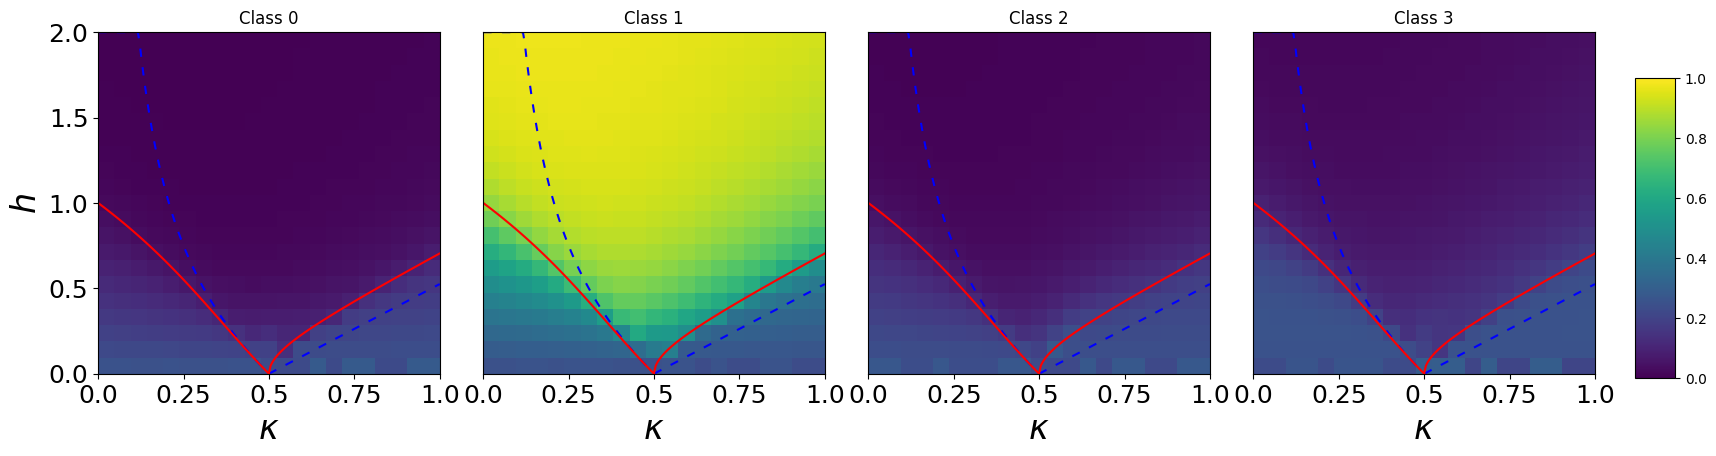

Training using phase ANTIPHASE
Labels: [2]
Number of training points: 11


Loss: 0.00330: 100%|██████████| 250/250 [00:16<00:00, 14.92it/s] 


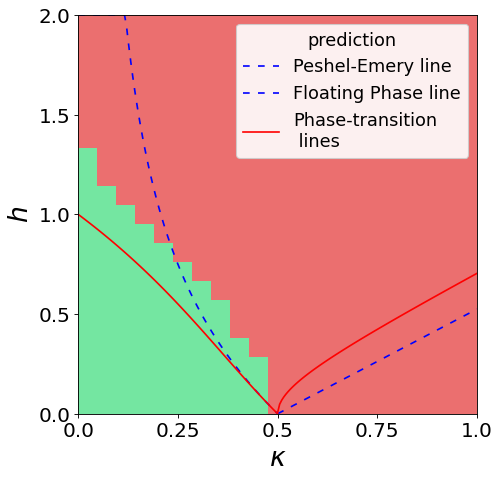

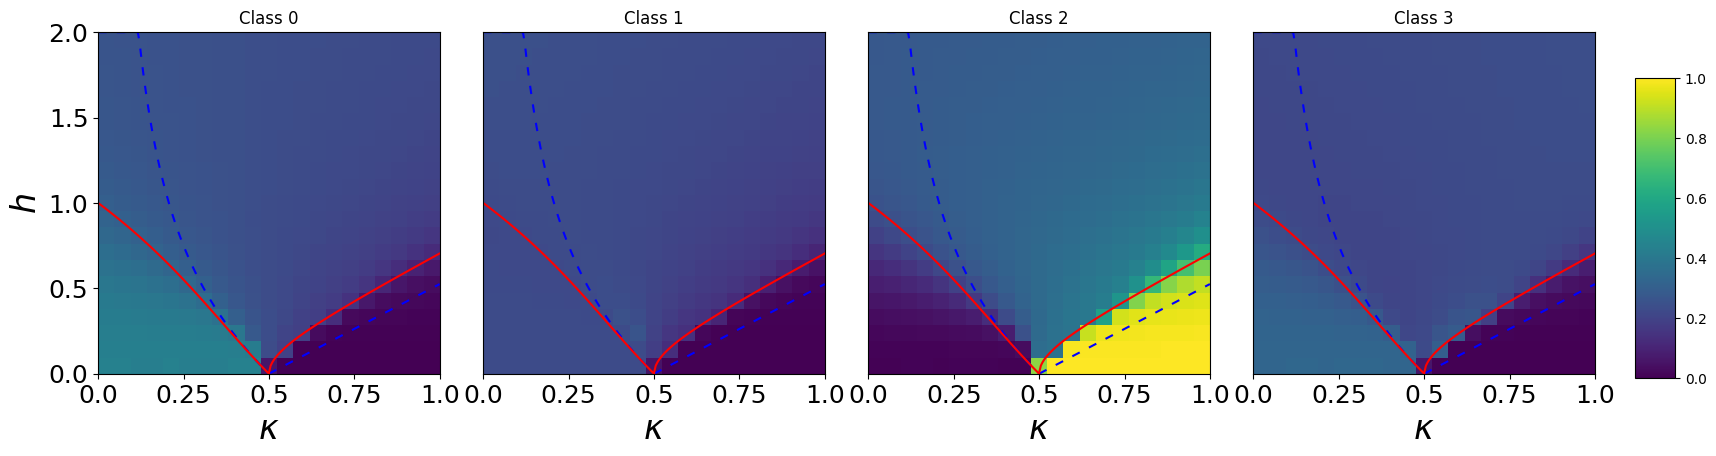

In [10]:
masks = [TT.mask_analitical_ferro, TT.mask_analitical_para, TT.mask_analitical_anti]
titles = ['FERROMAGNETIC', 'PARAMAGNETIC', 'ANTIPHASE']

for title, mask in zip(titles, masks):
    print(f'Training using phase {title}')
    TT.qcnn.reset_params()
    TT.train(epochs=250, train_indices=mask)
    TT.predict(plot=True, eachclass = True)
    plt.show()

### A2: Training using only TWO of the three phases:

Training excluding phase ANTIPHASE
Labels: [0 1]
Number of training points: 30


  0%|          | 0/250 [00:00<?, ?it/s]/home/saverio/.local/lib/python3.10/site-packages/autoray/autoray.py:981: UserWarning: Explicitly requested dtype <class 'jax.numpy.complex128'> requested in astype is not available, and will be truncated to dtype complex64. To enable more dtypes, set the jax_enable_x64 configuration option or the JAX_ENABLE_X64 shell environment variable. See https://github.com/google/jax#current-gotchas for more.
  return x.astype(dtype, **kwargs)
Loss: 0.07936: 100%|██████████| 250/250 [00:19<00:00, 12.64it/s]


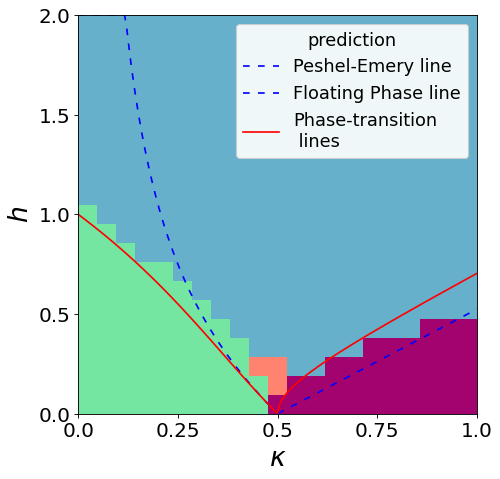

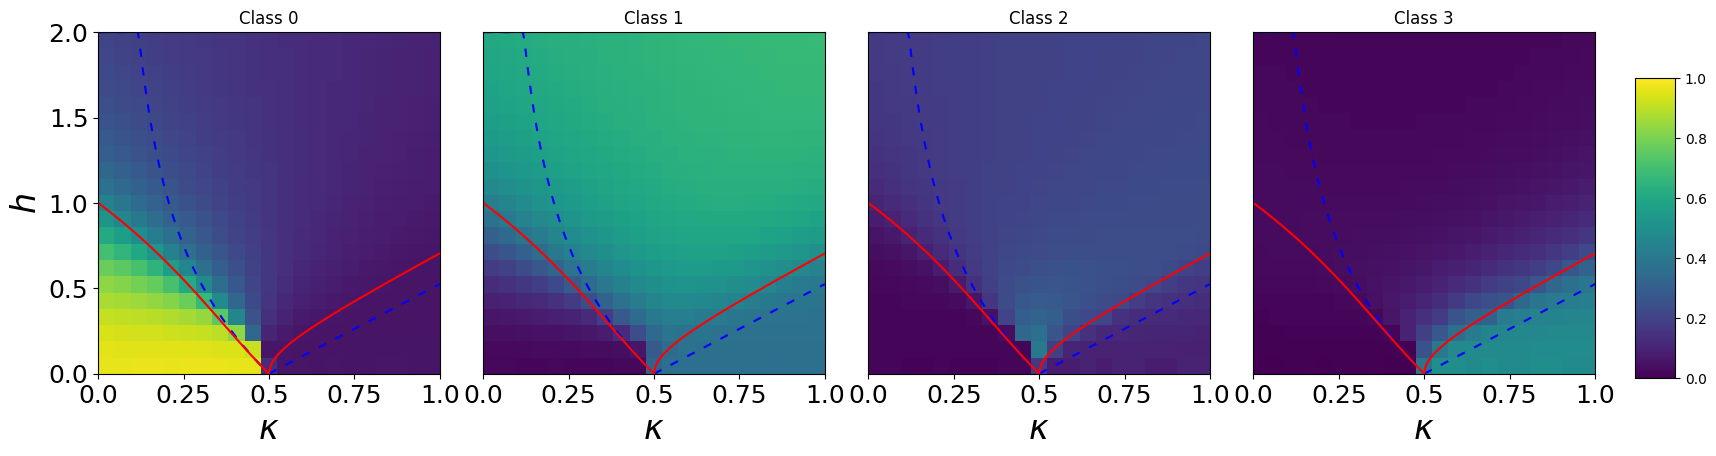

Training excluding phase PARAMAGNETIC
Labels: [0 2]
Number of training points: 31


Loss: 0.02581: 100%|██████████| 250/250 [00:22<00:00, 11.17it/s]


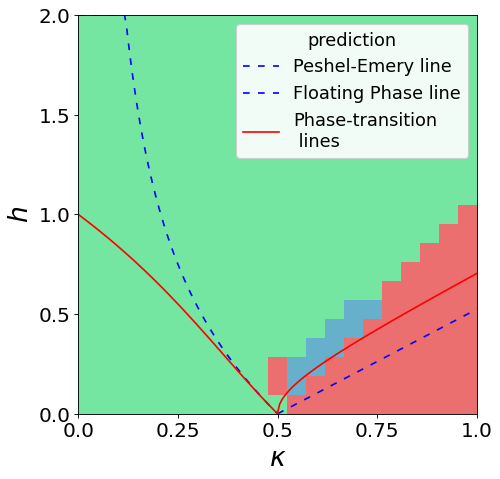

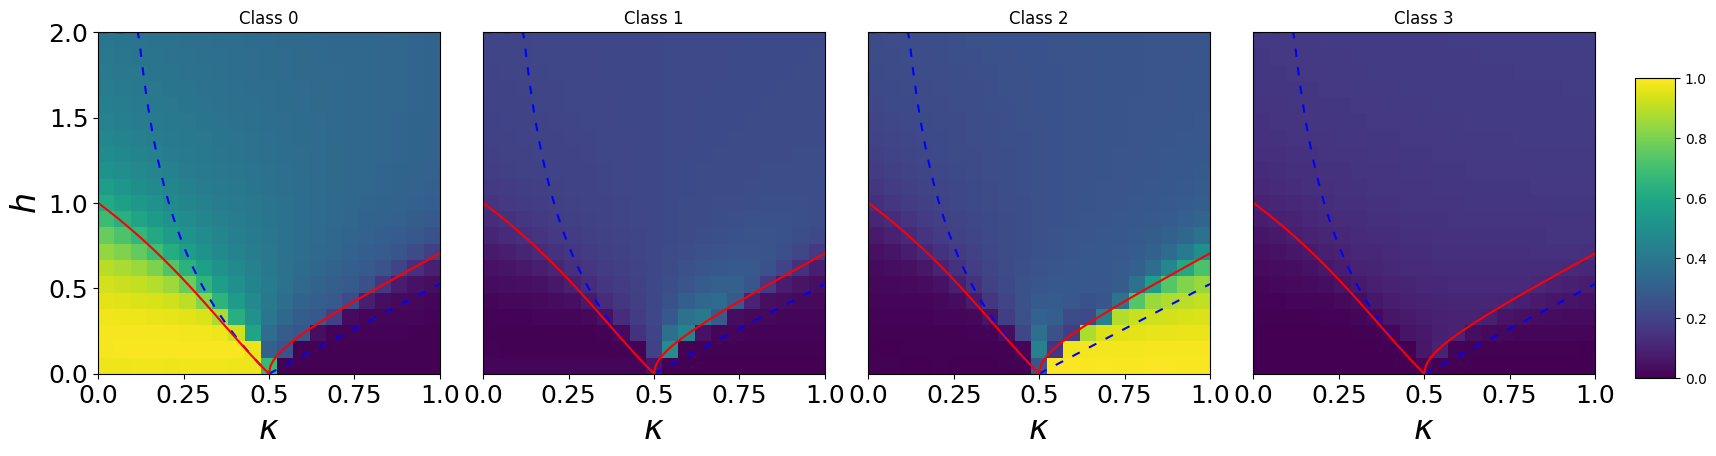

Training excluding phase FERROMAGNETIC
Labels: [1 2]
Number of training points: 21


Loss: 0.02722: 100%|██████████| 250/250 [00:20<00:00, 11.97it/s]


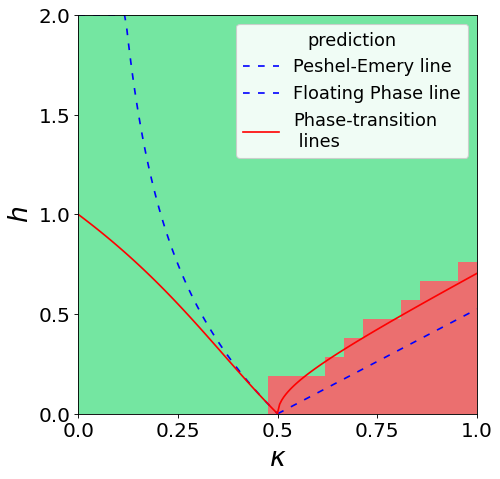

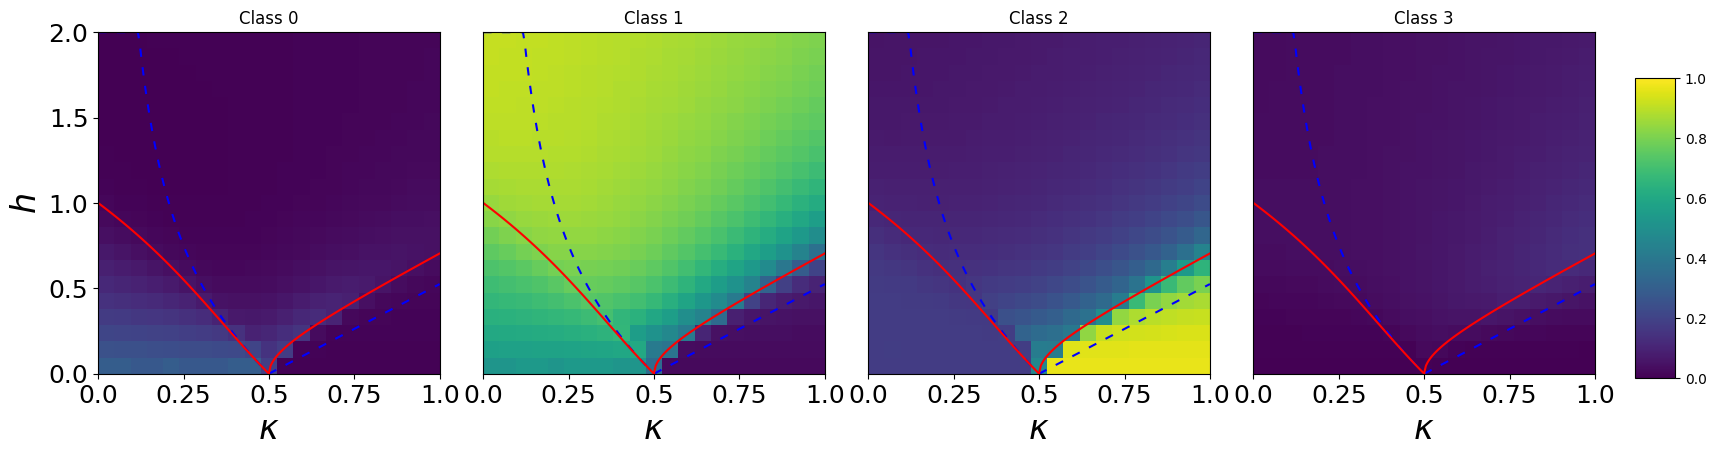

In [11]:
masks2  = [np.logical_or(masks[0], masks[1]), np.logical_or(masks[0], masks[2]), np.logical_or(masks[1], masks[2])]
titles2 = ['ANTIPHASE', 'PARAMAGNETIC', 'FERROMAGNETIC']

for title, mask in zip(titles2, masks2):
    print(f'Training excluding phase {title}')
    TT.qcnn.reset_params()
    TT.train(epochs=250, train_indices=mask)
    TT.predict(plot=True, eachclass = True)
    plt.show()

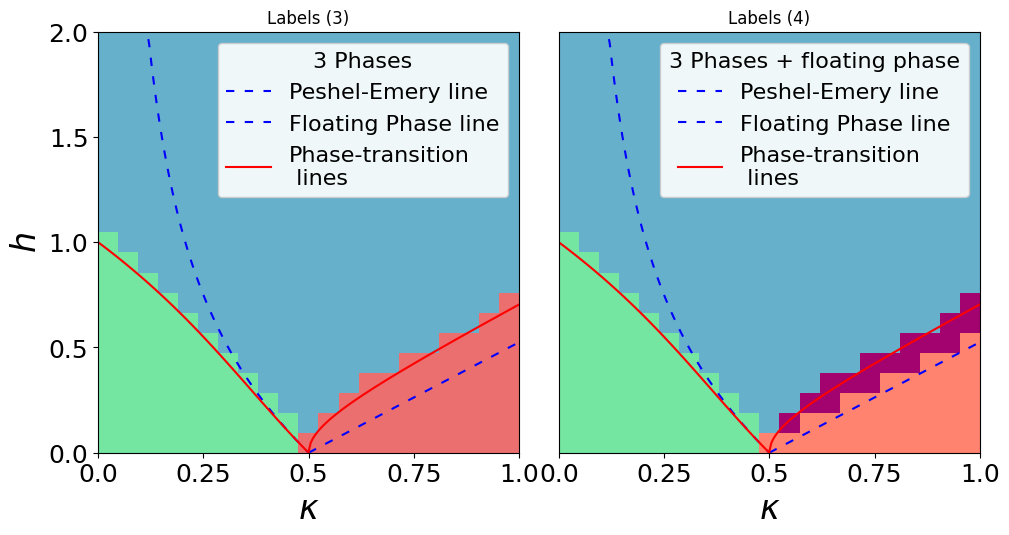

In [28]:
TT.plot_labels()

In [97]:
b = [1,2,1]
a = []

DIM = 18
nperax = 4
for i in range(DIM):
    a.append(b)

for h in np.linspace(0,2,nperax):
    for k in np.linspace(0,1,nperax):
        file = f'../fakedata/{DIM}/shapes_sites_ANNNI_L_{DIM}_h_{h:.2f}_kappa_{k:.2f}'
        np.savetxt(file, a)

a = np.loadtxt(TT.tensor_str(0,0))
while len(a) < 2*DIM:
    a = np.append(a, a[0])

for h in np.linspace(0,2,nperax):
    for k in np.linspace(0,1,nperax):
        file = f'../fakedata/{DIM}/tensor_sites_ANNNI_L_{DIM}_h_{h:.2f}_kappa_{k:.2f}'
        np.savetxt(file, a)